# Identify Fraud from Enron Dataset 
### by Thuy Quach

### 1. Project overview
In 2000, Enron was one of the largest companies in the United States. By 2002, it had collapsed into bankruptcy due to widespread corporate fraud. In the resulting Federal investigation, a significant amount of typically confidential information entered into the public record, including tens of thousands of emails and detailed financial data for top executives. 

In this project, I built a person of interest identifier based on financial and email data made public as a result of the Enron scandal. Person of interest (POI) were who indicted, reached a settlement or plea deal with the government, or testified in exchange for prosecution immunity. I used a combination of email and financial data of 146 executives at Enron to identify POIs.



### 2. Methods

- Exploring Enron dataset
- Feature processing and selections
- Algorithm selections
- Model validation


### 3. Exploring Enron Dataset

In [3]:
import os
os.chdir('/Users/thuy/Google Drive/Introduction to machine learning/ud120-projects/final_project')



In [4]:
import pickle
enron_data = pickle.load(open("final_project_dataset.pkl", "r"))


In [5]:
# number of people
print "There are ", len(enron_data), "excecutives in Enron Dataset"

There are  146 excecutives in Enron Dataset


In [6]:
# name of all the excecutives
print enron_data.keys()

['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HORTON STANLEY C', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'UMANOFF ADAM S', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'MCCARTY DANNY J', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RICHARD S', 'SHERRIFF JOHN R', 'SHELBY 

There are one name that was not a person name 'THE TRAVEL AGENCY IN THE PARK'. This was an outlier.

In [7]:
enron_data.pop('THE TRAVEL AGENCY IN THE PARK', 0)

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

In [8]:
# number of features
print "There are ", len(enron_data['SKILLING JEFFREY K'].keys()), "features in the Enron Dataset"

There are  21 features in the Enron Dataset


In [9]:
# list of features
print "List of features: " + "\n" + str(enron_data['SKILLING JEFFREY K'].keys())

List of features: 
['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_this_person']


In [10]:
# count people of interest
count_poi = 0
poi_name = []
for entry in enron_data:
    if enron_data[entry]['poi'] == 1:
        count_poi += 1
        poi_name.append(entry)
print "There are " + str(count_poi) + " person of interest."
print poi_name

There are 18 person of interest.
['HANNON KEVIN P', 'COLWELL WESLEY', 'RIEKER PAULA H', 'KOPPER MICHAEL J', 'SHELBY REX', 'DELAINEY DAVID W', 'LAY KENNETH L', 'BOWEN JR RAYMOND M', 'BELDEN TIMOTHY N', 'FASTOW ANDREW S', 'CALGER CHRISTOPHER F', 'RICE KENNETH D', 'SKILLING JEFFREY K', 'YEAGER F SCOTT', 'HIRKO JOSEPH', 'KOENIG MARK E', 'CAUSEY RICHARD A', 'GLISAN JR BEN F']


Let's explore something more about those POIs. 

In [11]:
#How many data have “NaN” for their "long-term-incentives"
count_total_incentives_NaN = 0
for entry in enron_data:
    if enron_data[entry]['long_term_incentive'] == 'NaN':
        count_total_incentives_NaN += 1
print 'NaN data for long_term_incentives:', count_total_incentives_NaN


NaN data for long_term_incentives: 79


In [12]:
#How many folks in this dataset have a 'NaN' salary? 
count_salary = 0
for entry in enron_data:
    if enron_data[entry]['salary'] == 'NaN':
        count_salary +=1
print 'NaN for salary:', count_salary

NaN for salary: 50


In [13]:
# Any data that all 'NaN' in main features:
for entry in enron_data:
    if enron_data[entry]['director_fees'] == 'NaN' and enron_data[entry]['total_stock_value'] == 'NaN' and enron_data[entry]['total_payments'] == 'NaN':
        print entry

LOCKHART EUGENE E


In [14]:
enron_data['LOCKHART EUGENE E']

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 'NaN',
 'total_stock_value': 'NaN'}

So this person LOCKHART EUGENE E had all the features in NaN and was not a POI. This person was an outlier

In [15]:
enron_data.pop('LOCKHART EUGENE E', 0)

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 'NaN',
 'total_stock_value': 'NaN'}

Let's exploring some bivariative relationship between some quantitative features from the Enron dataset. 

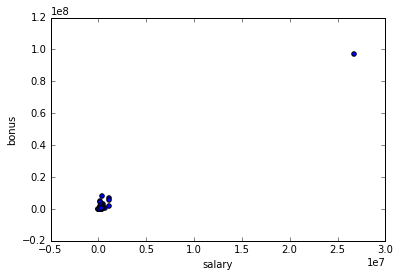

In [16]:
# salary vs. bonus
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
%matplotlib inline

### read in data dictionary, convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)


### your code below
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

We could see that there was an outlier that was extremely higher than the rest of the data. Let's come back to the dataset and see what was the data point.

In [17]:
# remove NaN's and find max salary 
salary_list = []
for entry in enron_data:
    if type (enron_data[entry]['salary']) == int :
        salary_list.append(enron_data[entry]['salary'])
print "Total people with salary: " + str(len(salary_list))
print "Maxium salary was " + str(max(salary_list))

Total people with salary: 95
Maxium salary was 26704229


In [18]:
# find person with max salary
for entry in enron_data:
    if enron_data[entry]['salary'] == 26704229:
        print "Name of person with maximum salary " + entry

Name of person with maximum salary TOTAL


So, the outlier was the TOTAL salary and bonus. I removed it from the dataset

In [19]:
# remove outlier from the data
enron_data.pop('TOTAL',0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [20]:
import numpy as np
# mean salary
print "Average salary: " + str(int(np.mean(salary_list)))


Average salary: 562194


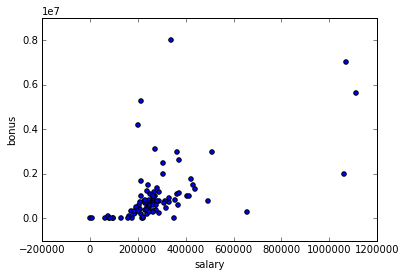

In [21]:
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
data_dict.pop('TOTAL', 0)
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)


### your code below
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

We would argue that there’s 4 more outliers to investigate; let's look at a couple of them. Two people made bonuses of at least 5 million dollars, and a salary of over 1 million dollars; in other words, they made out like bandits. What are the names associated with those point? Are they POIs?

In [22]:
# catch outliers with high salary
from pprint import pprint
outliers_salary = []
for key in enron_data:
    val = enron_data[key]['salary']
    if val == 'NaN':
        continue
    outliers_salary.append((key,int(val)))

top_4 = sorted(outliers_salary,key=lambda x:x[1],reverse=True)[:4]

pprint(top_4)

[('SKILLING JEFFREY K', 1111258),
 ('LAY KENNETH L', 1072321),
 ('FREVERT MARK A', 1060932),
 ('PICKERING MARK R', 655037)]


In [23]:
# are they POIs?
for people in top_4:
    if enron_data[people[0]]['poi'] == 1:
        print people[0]

SKILLING JEFFREY K
LAY KENNETH L


So, there were two of top 4 outlier salary were POIs. 

### 4. Features processing

The data has been cleaned. Next step I added a new feature. From the intuition about the data, I guessed that the more message exchanged among POIs (fraction of from_this_person_to_poi and from_poi_to_this_person to total_message) the more chance of the person is POI. 

In [24]:

def get_total_list(key1, key2):
    'combine 2 lists in one, assign NaN to 0'
    new_list = []
    for i in enron_data:
        # assign NaN to 0
        if enron_data[i][key1] == 'NaN' or enron_data[i][key2] == 'NaN':
            new_list.append(0.)
        elif enron_data[i][key1]>=0:
            new_list.append(float(enron_data[i][key1]) + float(enron_data[i][key2]))
    return new_list

In [25]:
# get the total poi related emails:
total_poi_emails = get_total_list('from_this_person_to_poi', 'from_poi_to_this_person')

In [26]:
# get the total emails
total_emails = get_total_list('to_messages', 'from_messages')



In [27]:
def fraction_list(list1, list2):
    'devide one list by other'
    fraction = []
    for i in range(0,len(list1)):
        if list2[i] == 0.0:
            fraction.append(0.0)
                #print list2[j]
                #fraction.append(0.0)
        else:
            fraction.append(float(list1[i])/float(list2[i]))
            #print fraction
    return fraction

In [28]:
# get the fraction of poi emails
fraction_poi_emails = fraction_list(total_poi_emails, total_emails)


In [29]:
# add this new feature to my data
count = 0
for i in enron_data:
    enron_data[i]['fraction_poi_emails'] = fraction_poi_emails[count]
    count += 1

# test
print 'SKILLING fraction_poi_emails: ', enron_data['SKILLING JEFFREY K']['fraction_poi_emails']
    


SKILLING fraction_poi_emails:  0.031593038822


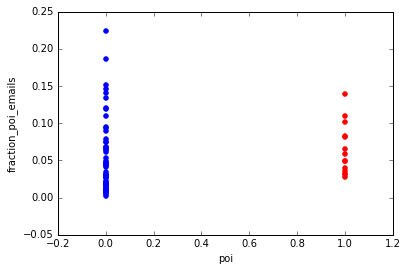

In [30]:
# let's test if this feature has any correlation with POIs
new_features_list = ['poi', 'fraction_poi_emails']
data = featureFormat(enron_data, new_features_list)

%matplotlib inline
### your code below
for point in data:
    poi = point[0]
    fraction_poi_emails = point[1]
    #matplotlib.pyplot.boxplot( data )
    if point[0] == 1:
        matplotlib.pyplot.scatter(poi, fraction_poi_emails, color = 'r')
    else:
        matplotlib.pyplot.scatter(poi, fraction_poi_emails, color = 'b')
    #matplotlib.pyplot.boxplot(data)
matplotlib.pyplot.xlabel("poi")
matplotlib.pyplot.ylabel("fraction_poi_emails")
matplotlib.pyplot.show()


I can see the different of fraction of poi and non-poi emails. Let's use this new feature to see if it improves the classifier.

#### Original features

In [55]:
import pickle
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from sklearn.cross_validation import train_test_split
import numpy as np
np.random.seed(42)
from time import time
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# load the data
data_dict = pickle.load(open("../final_project/final_project_dataset.pkl", "r") )

# features_list
features_list = ['poi','salary', 'from_poi_to_this_person', 'from_this_person_to_poi', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'director_fees', 'deferred_income', 'long_term_incentive']

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

# split data inton training and testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)

# choose decision tree
from sklearn.tree import DecisionTreeClassifier
t0 = time()
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'Decision Tree algorithm run time: ', round(time()-t0, 3), 's'


# list of importance features
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(10):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])

Accuracy: 0.844827586207
Precision:  0.333333333333
Recall:  0.125
Decision Tree algorithm run time:  0.003 s
Feature Ranking: 
1 feature salary (0.337437907714)
2 feature from_poi_to_this_person (0.161410018553)
3 feature from_this_person_to_poi (0.109563164109)
4 feature to_messages (0.101688311688)
5 feature deferral_payments (0.0753246753247)
6 feature total_payments (0.0753246753247)
7 feature exercised_stock_options (0.0564935064935)
8 feature bonus (0.048961038961)
9 feature restricted_stock (0.0337967018319)
10 feature shared_receipt_with_poi (0.0)


#### Add new features

In [32]:

# features_list
features_list = ['poi','salary', 'from_poi_to_this_person', 'fraction_poi_emails', 'from_this_person_to_poi', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'director_fees', 'deferred_income', 'long_term_incentive']

data = featureFormat(enron_data, features_list)
labels, features = targetFeatureSplit(data)

# split data inton training and testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)

# choose decision tree
from sklearn.tree import DecisionTreeClassifier
t0 = time()
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'Decision Tree algorithm run time: ', round(time()-t0, 3), 's'


# list of importance features
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(10):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])

Accuracy: 0.758620689655
Precision:  0.181818181818
Recall:  0.285714285714
Decision Tree algorithm run time:  0.003 s
Feature Ranking: 
1 feature salary (0.453596502238)
2 feature from_poi_to_this_person (0.210759412118)
3 feature fraction_poi_emails (0.156633906634)
4 feature from_this_person_to_poi (0.078316953317)
5 feature to_messages (0.0696150696151)
6 feature deferral_payments (0.0310781560782)
7 feature total_payments (0.0)
8 feature exercised_stock_options (0.0)
9 feature bonus (0.0)
10 feature restricted_stock (0.0)


The new features improved recall but not accuracy and precision. So, I decided not to use the new feature.

For feature ranking, it first looked like the feature ranking just rank to the order of the feature list. This may not work very well. It could be better to use SelectKbest.

Second, I see that though the accuracy was hight 0.84 but the precision and recall was low. The reason was having imbalanced classes like we have in the Enron dataset (many more non-POIs than POIs) introduces some special challenges, namely that I can just guess the more common class label for every point, not a very insightful strategy, and still get pretty good accuracy. Precision and recall can help illuminate my performance better.

Now let's run SelectKbest

In [33]:
import pickle
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from sklearn.cross_validation import train_test_split
import numpy as np
np.random.seed(42)
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline

# load the data
data_dict = pickle.load(open("../final_project/final_project_dataset.pkl", "r") )

# featureas_list
features_list = ['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'from_poi_to_this_person']

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

# split data inton training and testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k=10)
selectedFeatures = selector.fit(features,labels)
feature_names = [features_list[i] for i in selectedFeatures.get_support(indices=True)]
print 'Best features: ', feature_names

Best features:  ['deferral_payments', 'exercised_stock_options', 'bonus', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'from_messages', 'other', 'director_fees', 'deferred_income']


//anaconda/lib/python2.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Let's use the features and run the again the Decision Tree to see any improvement

In [56]:
import pickle
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from sklearn.cross_validation import train_test_split
import numpy as np
np.random.seed(42)
from time import time
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# load the data
data_dict = pickle.load(open("../final_project/final_project_dataset.pkl", "r") )

# features_list
features_list = ['poi','deferral_payments', 'exercised_stock_options', 'bonus', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'from_messages', 'other', 'director_fees', 'deferred_income']

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

# split data inton training and testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)

# choose decision tree
from sklearn.tree import DecisionTreeClassifier
t0 = time()
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)

print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Decision Tree algorithm run time: ', round(time()-t0, 3), 's'



Accuracy: 0.862068965517
Precision:  0.5
Recall:  0.375
F1 score: 0.428571428571
Decision Tree algorithm run time:  0.004 s


The selected features improved the Decision tree performance. The accuracy increased from 0.84 to 0.86, the precision and recall was much better with value of 0.5 and 0.375 respectively.



### Algorithm Selection and Tunning
I have tried Decision tree. With the small samples like that Naive Bayes may not work very well. So, let's try Random Forest, Adaboost and NearestK. 

#### Random Forest

In [57]:
features_list = ['poi','deferral_payments', 'exercised_stock_options', 'bonus', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'from_messages', 'other', 'director_fees', 'deferred_income']
data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

# split data inton training and testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)

from sklearn.ensemble import RandomForestClassifier
t0 = time()
clf = RandomForestClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Random algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.862068965517
Precision:  0.5
Recall:  0.125
F1 score: 0.2
Random algorithm run time:  0.034 s


Accuracy is the same as the decision tree but precision and recall were 0.

#### Adaboost

In [58]:
from sklearn.ensemble import AdaBoostClassifier
t0 = time()
clf = AdaBoostClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Adaboost algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.793103448276
Precision:  0.3
Recall:  0.375
F1 score: 0.333333333333
Adaboost algorithm run time:  0.13 s


Comparing to decision tree, accuracy was slightly lower, recall was the same and precision was lower.

#### Nearest K

In [59]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
t0 = time()
clf = NearestCentroid()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Nearest K algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.103448275862
Precision:  0.0769230769231
Recall:  0.5
F1 score: 0.133333333333
Nearest K algorithm run time:  0.005 s


Comparing to decision tree, accuracy and precision was very low but recall was higher.


#### Logistic Regression

In [60]:

from sklearn.linear_model import LogisticRegression
t0 = time()
clf = LogisticRegression()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Logistic regression algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.844827586207
Precision:  0.4
Recall:  0.25
F1 score: 0.307692307692
Logistic regression algorithm run time:  0.005 s


#### SVC

In [62]:
from sklearn import svm
t0 = time()
clf = svm.LinearSVC()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'SVC algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.724137931034
Precision:  0.1
Recall:  0.125
F1 score: 0.111111111111
SVC algorithm run time:  0.005 s


After trying other algorithms, I decided to go with Decision Tree and Logistic Regression because of their highest performance regarding overall accuracy, precision, recall and F1 score.

### Tuning by GridSearchCV

#### Decision Tree

In [48]:
t0 = time()
param_grid = {
         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
            'max_features': range(3,10)
          }
clf = GridSearchCV(DecisionTreeClassifier(), param_grid)
clf = clf.fit(features_train, labels_train)
print "done in %0.3fs" % (time() - t0)
print "Best estimator found by grid search:"
print clf.best_estimator_

done in 2.784s
Best estimator found by grid search:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=3, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=8, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [63]:
from sklearn.tree import DecisionTreeClassifier
t0 = time()
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Decision Tree algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.879310344828
Precision:  0.666666666667
Recall:  0.25
F1 score: 0.363636363636
Decision Tree algorithm run time:  0.004 s


#### Logistic Regression

In [43]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
clf = clf.fit(features_train, labels_train)
print "done in %0.3fs" % (time() - t0)
print "Best estimator found by grid search:"
print clf.best_estimator_

done in 94.558s
Best estimator found by grid search:
LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
